In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
btc = yf.Ticker('BTC-USD')
ltc = yf.Ticker('LTC-USD')
eth = yf.Ticker('ETH-USD')

btc_hist = btc.history(period='max')
ltc_hist = ltc.history(period='max')
eth_hist = eth.history(period='max')

btc_hist['Coin'] = 'BTC'
ltc_hist['Coin'] = 'LTC'
eth_hist['Coin'] = 'ETH'

In [3]:
btc_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Coin
Date,,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0,BTC
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0,BTC
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0,BTC
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0,BTC
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0,BTC


In [4]:
eth_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Coin
Date,,,,,,,,
2017-11-09 00:00:00+00:00,308.644989,329.451996,307.056000,320.884003,893249984,0.0,0.0,ETH
2017-11-10 00:00:00+00:00,320.670990,324.717987,294.541992,299.252991,885985984,0.0,0.0,ETH
2017-11-11 00:00:00+00:00,298.585999,319.453003,298.191986,314.681000,842300992,0.0,0.0,ETH
2017-11-12 00:00:00+00:00,314.690002,319.153015,298.513000,307.907990,1613479936,0.0,0.0,ETH
2017-11-13 00:00:00+00:00,307.024994,328.415009,307.024994,316.716003,1041889984,0.0,0.0,ETH


In [5]:
ltc_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Coin
Date,,,,,,,,
2014-09-17 00:00:00+00:00,5.08589,5.17077,4.96595,5.05855,3071840,0.0,0.0,LTC
2014-09-18 00:00:00+00:00,5.06543,5.06543,4.57996,4.68523,4569260,0.0,0.0,LTC
2014-09-19 00:00:00+00:00,4.68729,4.75582,4.25435,4.32777,3917450,0.0,0.0,LTC
2014-09-20 00:00:00+00:00,4.32920,4.61608,4.20219,4.28644,5490660,0.0,0.0,LTC
2014-09-21 00:00:00+00:00,4.26307,4.30013,4.15499,4.24592,2931220,0.0,0.0,LTC


In [6]:
print('Bitcoin Dataset Info: ')
print(btc_hist.info())
print('\nLitecoin Dataset Info: ')
print(ltc_hist.info())
print('\nEthereum Dataset Info: ')
print(eth_hist.info())

Bitcoin Dataset Info: 
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3872 entries, 2014-09-17 00:00:00+00:00 to 2025-04-23 00:00:00+00:00
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3872 non-null   float64
 1   High          3872 non-null   float64
 2   Low           3872 non-null   float64
 3   Close         3872 non-null   float64
 4   Volume        3872 non-null   int64  
 5   Dividends     3872 non-null   float64
 6   Stock Splits  3872 non-null   float64
 7   Coin          3872 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 272.2+ KB
None

Litecoin Dataset Info: 
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3872 entries, 2014-09-17 00:00:00+00:00 to 2025-04-23 00:00:00+00:00
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3872 non-null   float64
 1   High       

In [7]:
print(btc_hist.isna().sum(), end='\n\n')
print(ltc_hist.isna().sum(), end='\n\n')
print(eth_hist.isna().sum())

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Coin            0
dtype: int64

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Coin            0
dtype: int64

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Coin            0
dtype: int64


## coin_data 

In [8]:
coin_data = pd.concat([btc_hist, ltc_hist, eth_hist]).sort_index()
coin_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Coin
Date,,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0,BTC
2014-09-17 00:00:00+00:00,5.085890,5.170770,4.965950,5.058550,3071840,0.0,0.0,LTC
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0,BTC
2014-09-18 00:00:00+00:00,5.065430,5.065430,4.579960,4.685230,4569260,0.0,0.0,LTC
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0,BTC


In [9]:
coin_data['Coin'] = coin_data['Coin'].astype('category')
coin_data['Coin_Code'] = coin_data['Coin'].cat.codes
coin_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Coin,Coin_Code
Date,,,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0,BTC,0
2014-09-17 00:00:00+00:00,5.085890,5.170770,4.965950,5.058550,3071840,0.0,0.0,LTC,2
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0,BTC,0
2014-09-18 00:00:00+00:00,5.065430,5.065430,4.579960,4.685230,4569260,0.0,0.0,LTC,2
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0,BTC,0


In [10]:
coin_data['Coin'].unique()

['BTC', 'LTC', 'ETH']
Categories (3, object): ['BTC', 'ETH', 'LTC']

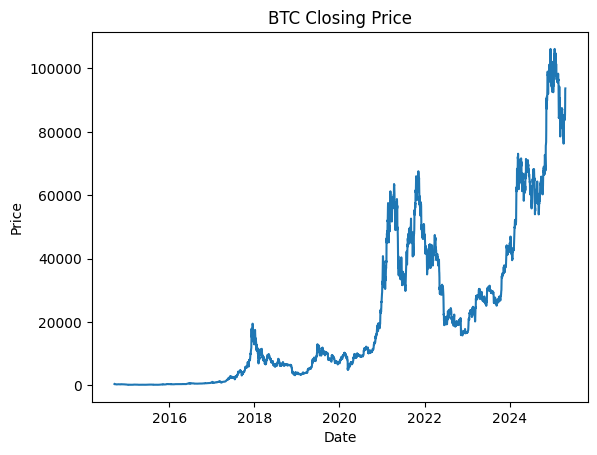

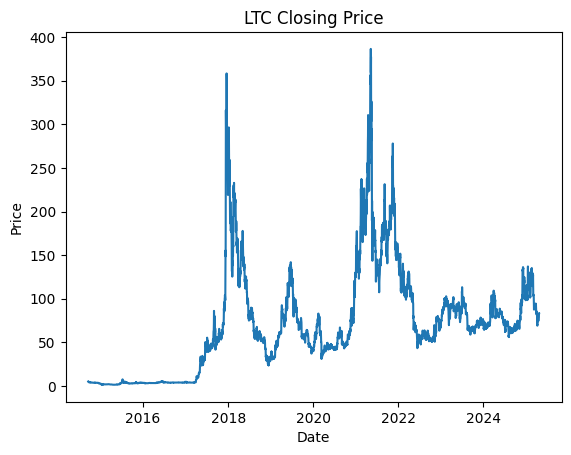

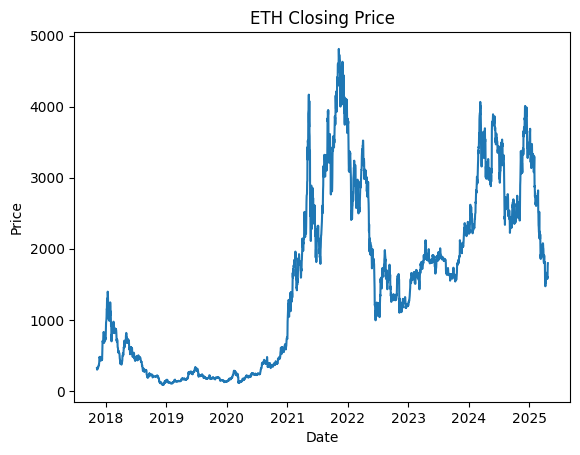

In [11]:
sns.lineplot(data=coin_data[coin_data['Coin'] =='BTC']['Close'])
plt.title('BTC Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
sns.lineplot(data=coin_data[coin_data['Coin'] =='LTC']['Close'])
plt.title('LTC Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
sns.lineplot(data=coin_data[coin_data['Coin'] =='ETH']['Close'])
plt.title('ETH Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [12]:
coin_data['Dividends'].unique(), coin_data['Stock Splits'].unique()

(array([0.]), array([0.]))

In [13]:
coin_data.drop(columns=['Dividends', 'Stock Splits'], inplace=True)

In [14]:
coin_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Coin', 'Coin_Code'], dtype='object')

In [15]:
coin_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Volume       0
Coin         0
Coin_Code    0
dtype: int64

In [16]:
# coin_data = coin_data[['Close', 'Volume', 'Coin', 'Coin_Code']]

In [17]:
coin_coded_data = coin_data[[x for x in coin_data.columns if x not in ['Coin']]]
coin_coded_data.head()

,Open,High,Low,Close,Volume,Coin_Code
Date,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0
2014-09-17 00:00:00+00:00,5.085890,5.170770,4.965950,5.058550,3071840,2
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0
2014-09-18 00:00:00+00:00,5.065430,5.065430,4.579960,4.685230,4569260,2
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0


In [18]:
def split_data(df, split_date=None, split_ratio=0.8):
    df.sort_index(inplace=True)

    if split_date is None:
        split_date = df.index[int(len(df) * split_ratio)]

    train = df[df.index < split_date]
    test = df[df.index >= split_date]
    return train, test

def scale_data(train, test):
    selected_cols = train.columns[train.columns != 'Coin_Code']
    train_ = train[selected_cols]
    test_ = test[selected_cols]
    scaler = MinMaxScaler()
    train_scaled_values = scaler.fit_transform(train_)
    test_scaled_values = scaler.transform(test_)
    train_scaled = pd.DataFrame(train_scaled_values, columns=selected_cols, index=train.index)
    test_scaled = pd.DataFrame(test_scaled_values, columns=selected_cols, index=test.index)

    train_scaled['Coin_Code'] = train['Coin_Code']
    test_scaled['Coin_Code'] = test['Coin_Code']

    return train_scaled, test_scaled, scaler



In [19]:
train, test = split_data(coin_coded_data, split_ratio=0.9)
train_scale, test_scale, scaler = scale_data(train, test)
train_scale.shape, test_scale.shape

((9420, 6), (1047, 6))

In [20]:
import pickle

# Save
with open('./checkpoints/merge_scalerv2.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Load
with open('./checkpoints/merge_scalerv2.pkl', 'rb') as f:
    scaler_loaded = pickle.load(f)

In [21]:
train_scale.head()

,Open,High,Low,Close,Volume,Coin_Code
Date,,,,,,
2014-09-17 00:00:00+00:00,0.006359,0.006330,0.006327,0.006242,0.000059,0
2014-09-17 00:00:00+00:00,0.000054,0.000052,0.000054,0.000053,0.000007,2
2014-09-18 00:00:00+00:00,0.006236,0.006177,0.005776,0.005792,0.000097,0
2014-09-18 00:00:00+00:00,0.000054,0.000050,0.000049,0.000048,0.000012,2
2014-09-19 00:00:00+00:00,0.005788,0.005783,0.005375,0.005386,0.000107,0


In [22]:
def create_sequences(df, seq_len=30):
    sequences = []
    targets = []
    coin_ids = []
    
    for coin, coin_df in df.groupby('Coin_Code'):
        coin_df = coin_df.sort_index()
        values = coin_df[['Open', 'High', 'Low', 'Close', 'Volume']].values
        
        for i in range(len(values) - seq_len):
            seq_x = values[i:i+seq_len]
            target_y = values[i+seq_len]
            sequences.append(seq_x)
            targets.append(target_y)
            coin_ids.append(coin)
    
    return np.array(sequences), np.array(targets), np.array(coin_ids)


In [23]:
X_train, y_train, coin_ids = create_sequences(train_scale, seq_len=60)
X_test, y_test, coin_ids_test = create_sequences(test_scale, seq_len=60)
X_train.shape, y_train.shape, coin_ids.shape, X_test.shape, y_test.shape, coin_ids_test.shape

((9240, 60, 5), (9240, 5), (9240,), (867, 60, 5), (867, 5), (867,))

In [24]:
counts = pd.Series(coin_ids).value_counts()
print(counts)

0    3463
2    3463
1    2314
Name: count, dtype: int64


In [25]:
pd.Series(coin_ids_test).value_counts()

0    289
1    289
2    289
Name: count, dtype: int64

In [26]:
model_1 = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 5)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(5)
])

model_1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [27]:
# early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [28]:
history_1 = model_1.fit(
    X_train, y_train,
    epochs=25,
    batch_size=32,
    validation_data=(X_test, y_test),
    shuffle=False
    # callbacks=[early_stop]
)

Epoch 1/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0045 - mean_absolute_error: 0.0334 - val_loss: 0.0078 - val_mean_absolute_error: 0.0455
Epoch 2/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0018 - mean_absolute_error: 0.0224 - val_loss: 0.0124 - val_mean_absolute_error: 0.0595
Epoch 3/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0015 - mean_absolute_error: 0.0205 - val_loss: 0.0050 - val_mean_absolute_error: 0.0390
Epoch 4/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0012 - mean_absolute_error: 0.0187 - val_loss: 0.0205 - val_mean_absolute_error: 0.0809
Epoch 5/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0012 - mean_absolute_error: 0.0191 - val_loss: 0.0046 - val_mean_absolute_error: 0.0346
Epoch 6/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0011 - mean_absolute_error: 0.0174 - val_loss: 0.0216 - val_mean_absolute_error: 0.0881
Epoch 7/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0010 - mean_absolute_error: 0.0

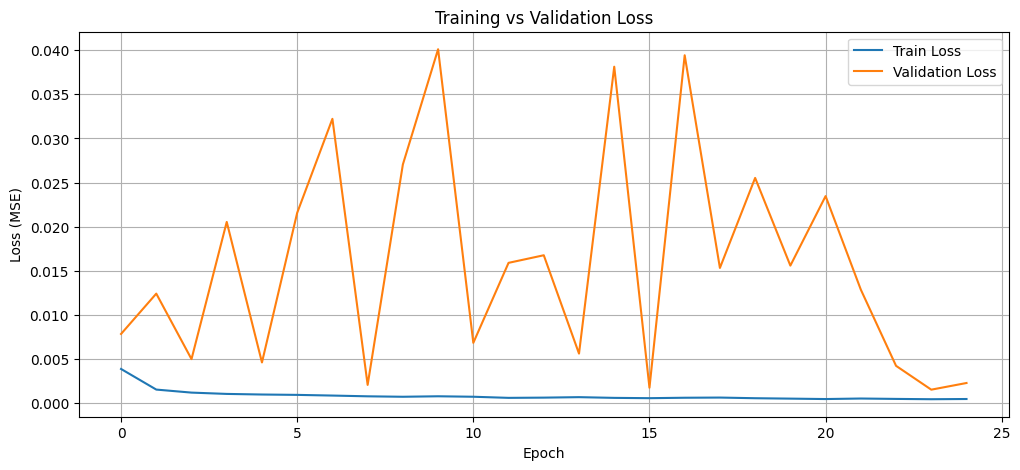

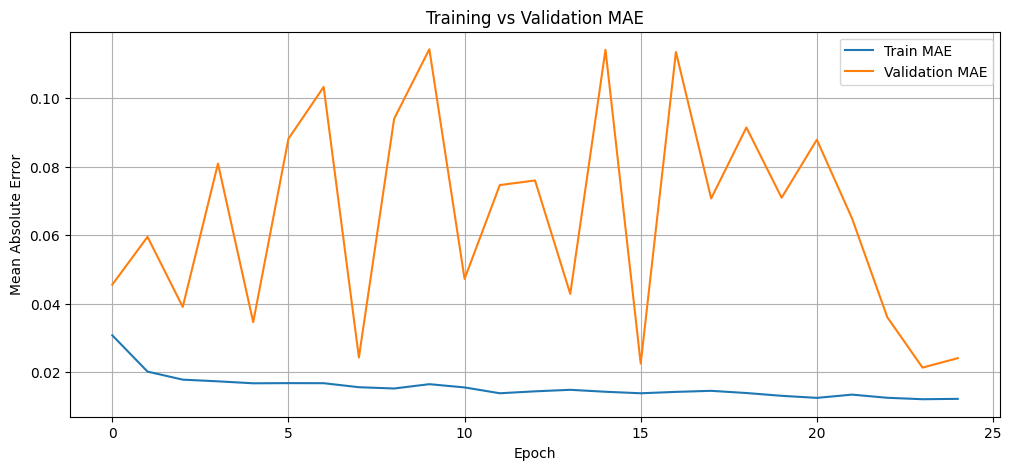

In [29]:
import matplotlib.pyplot as plt

# Loss
plt.figure(figsize=(12, 5))
plt.plot(history_1.history['loss'], label='Train Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# MAE
plt.figure(figsize=(12, 5))
plt.plot(history_1.history['mean_absolute_error'], label='Train MAE')
plt.plot(history_1.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Training vs Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()


In [30]:
X_test.shape

(867, 60, 5)

In [31]:
def prediction(model, X_test, y_test):
    predicted = model.predict(X_test)
    print(predicted.shape)

    # def expand_for_inverse(scaled_close, total_features=5, target_col=3):
    #     expanded = np.zeros((scaled_close.shape[0], total_features))
    #     expanded[:, target_col] = scaled_close.flatten()
        # return expanded

    # predicted_expanded = expand_for_inverse(predicted)
    # real_expanded = expand_for_inverse(y_test)

    predicted_full = scaler.inverse_transform(predicted)
    real_full = scaler.inverse_transform(y_test)

    predicted_close = predicted_full[:, 3]
    real_close = real_full[:, 3]
    return predicted_close, real_close


In [32]:
def evaluate_model(y_true, y_pred, model_name='Model'):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"{model_name} Evaluation")
    print(f"MSE : {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAE : {mae}")
    print(f"R²  : {r2}")

In [33]:
predicted_close, real_close = prediction(model_1, X_test, y_test)
evaluate_model(real_close, predicted_close, model_name='LSTM-1')

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
(867, 5)
LSTM-1 Evaluation
MSE : 16794341.426620916
RMSE: 4098.0899729777675
MAE : 1960.0352668014227
R²  : 0.9885294488007499


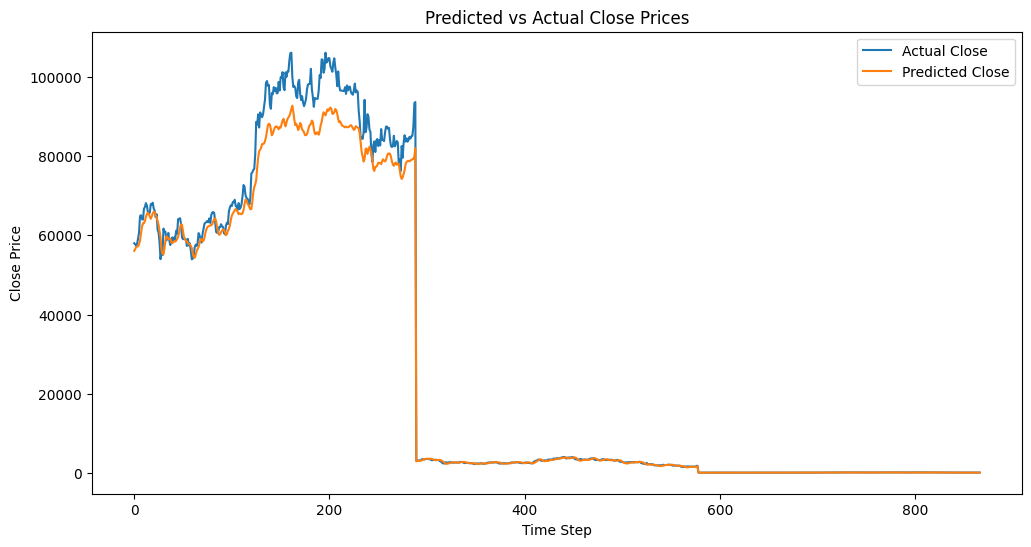

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(real_close, label="Actual Close")
plt.plot(predicted_close, label="Predicted Close")
plt.title("Predicted vs Actual Close Prices")
plt.xlabel("Time Step")
plt.ylabel("Close Price")
plt.legend()
plt.show()


In [35]:
X_train.shape[1]

60

In [36]:

model_list_lstm = [
    [
        LSTM(32, return_sequences=True, input_shape=(X_train.shape[1], 5)),
        Dropout(0.2),
        LSTM(32, return_sequences=False),
        Dense(units=5)],
    [
        LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 5)),
        Dropout(0.2),
        LSTM(64, return_sequences=False),
        Dense(units=5)
    ],
    [
        LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 5)),
        Dropout(0.2),
        LSTM(128, return_sequences=False),
        Dense(units=5)
    ],
    [
        LSTM(32, return_sequences=True, input_shape=(X_train.shape[1], 5)),
        Dropout(0.2),
        LSTM(32, return_sequences=True),
        Dropout(0.2),
        LSTM(32, return_sequences=False),
        Dense(units=5)
    ],
    [
        LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 5)),
        Dropout(0.2),
        LSTM(64, return_sequences=True),
        Dropout(0.2),
        LSTM(64, return_sequences=False),
        Dense(units=5)
    ],
    [
        LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 5)),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(units=5)
    ]
]

In [37]:
best_model = None
best_history = None
best_val_loss = float('inf')
best_index = -1

histories = []

for i, arch in enumerate(model_list_lstm):
    print(f"\n Training model {i+1}/{len(model_list_lstm)}...")

    model = Sequential()
    for layer in arch:
        model.add(layer)

    model.compile(optimizer='adam', loss='mean_squared_error')
    # model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

    # early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        epochs=60,
        batch_size=32,
        validation_data=(X_test, y_test),
        shuffle=False,
        verbose=0
    )

    val_loss = min(history.history['val_loss'])
    histories.append((model, history))

    print(f" Model {i+1} best val_loss: {val_loss:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = model
        best_history = history
        best_index = i

print(f"\n Best model is Model {best_index+1} with val_loss: {best_val_loss:.4f}")



 Training model 1/6...
 Model 1 best val_loss: 0.0021

 Training model 2/6...
 Model 2 best val_loss: 0.0021

 Training model 3/6...
 Model 3 best val_loss: 0.0026

 Training model 4/6...
 Model 4 best val_loss: 0.0071

 Training model 5/6...
 Model 5 best val_loss: 0.0039

 Training model 6/6...
 Model 6 best val_loss: 0.0014

 Best model is Model 6 with val_loss: 0.0014


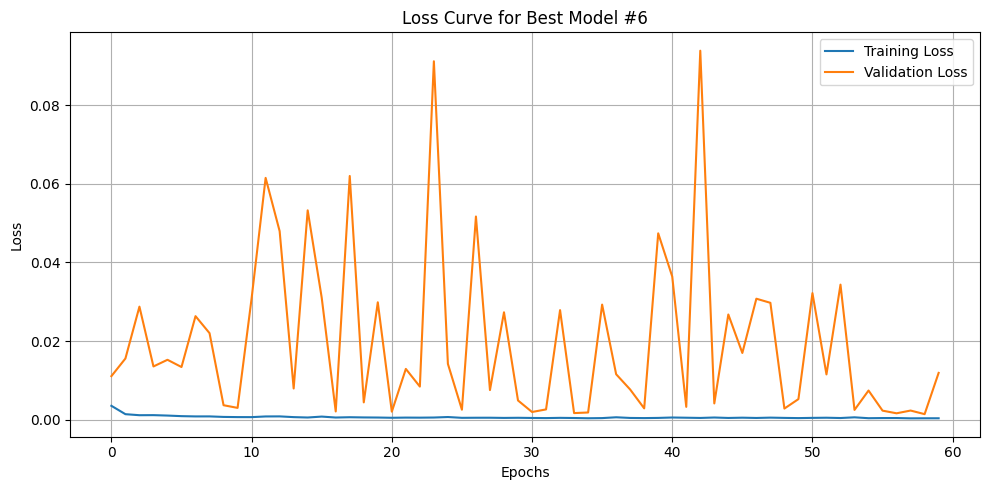

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(best_history.history['loss'], label='Training Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.title(f'Loss Curve for Best Model #{best_index+1}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
X_test.shape, y_test.shape, coin_ids_test.shape

((867, 60, 5), (867, 5), (867,))

## Test datasets

In [40]:
X_train, y_train, coin_ids = create_sequences(train_scale, seq_len=60)
X_test, y_test, coin_ids_test = create_sequences(test_scale, seq_len=60)
X_train.shape, y_train.shape, coin_ids.shape, X_test.shape, y_test.shape, coin_ids_test.shape

# bitcoin
btc_mask = coin_ids_test == 0
X_test_btc = X_test[btc_mask]
y_test_btc = y_test[btc_mask]

# litecoin
ltc_mask = coin_ids_test == 1
X_test_ltc = X_test[ltc_mask]
y_test_ltc = y_test[ltc_mask]

# ethereum
eth_mask = coin_ids_test == 2
X_test_eth = X_test[eth_mask]
y_test_eth = y_test[eth_mask]

# Equal 
min_count = min(np.sum(btc_mask), np.sum(eth_mask), np.sum(ltc_mask))

btc_indices = np.where(btc_mask)[0][:min_count]
eth_indices = np.where(eth_mask)[0][:min_count]
ltc_indices = np.where(ltc_mask)[0][:min_count]

equal_indices = np.concatenate([btc_indices, eth_indices, ltc_indices])

X_test_equal = X_test[equal_indices]
y_test_equal = y_test[equal_indices]

# Random 
np.random.seed(42)
rand_indices = np.random.choice(len(X_test), size=250, replace=False)

X_test_random = X_test[rand_indices]
y_test_random = y_test[rand_indices]

x_test_sets = [X_test_btc, X_test_ltc, X_test_eth, X_test_equal, X_test_random]
y_test_sets = [y_test_btc, y_test_ltc, y_test_eth, y_test_equal, y_test_random]
x_test_names = ['BTC', 'LTC', 'ETH', 'Equal', 'Random']
 
for i in range(len(x_test_sets)):
    print(f"X_test_{x_test_names[i]} shape: {x_test_sets[i].shape}")



X_test_BTC shape: (289, 60, 5)
X_test_LTC shape: (289, 60, 5)
X_test_ETH shape: (289, 60, 5)
X_test_Equal shape: (867, 60, 5)
X_test_Random shape: (250, 60, 5)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
(289, 5)
BTC Evaluation
MSE : 242139642.53980765
RMSE: 15560.836820036628
MAE : 15101.904181985294
R²  : 0.060263723763813615


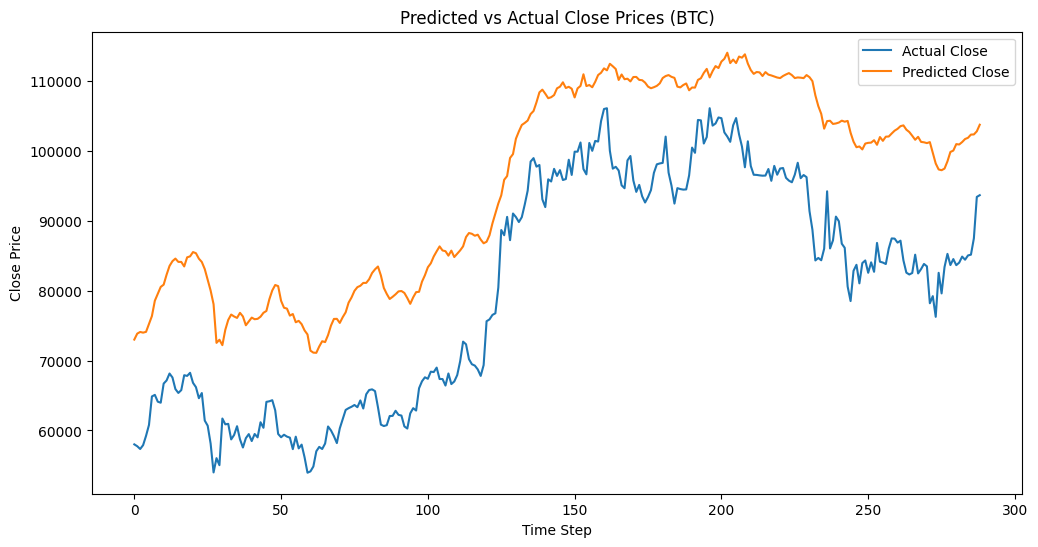

In [41]:
x_test_sets = [X_test_btc, X_test_ltc, X_test_eth, X_test_equal, X_test_random]
y_test_sets = [y_test_btc, y_test_ltc, y_test_eth, y_test_equal, y_test_random]
x_test_names = ['BTC', 'LTC', 'ETH', 'Equal', 'Random']

for i in range(len(x_test_sets)):
    x_test = x_test_sets[i]
    y_test = y_test_sets[i]
    
    predicted_close, real_close = prediction(best_model, x_test, y_test)
    evaluate_model(real_close, predicted_close, model_name=x_test_names[i])
    
    plt.figure(figsize=(12,6))
    plt.plot(real_close, label="Actual Close")
    plt.plot(predicted_close, label="Predicted Close")
    plt.title(f"Predicted vs Actual Close Prices ({x_test_names[i]})")
    plt.xlabel("Time Step")
    plt.ylabel("Close Price")
    plt.legend()
    plt.show()
    break

In [42]:
# save
best_model.save_weights('./checkpoints/merge_checkpointv2.weights.h5')

model_reload = Sequential()
for layer in model_list_lstm[best_index]:
    model_reload.add(layer)

# Restore the weights
model_reload.load_weights('./checkpoints/merge_checkpointv2.weights.h5')


print('saved and reloaded model weigths')

saved and reloaded model weigths


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
(289, 5)
BTC Evaluation
MSE : 242139642.53980765
RMSE: 15560.836820036628
MAE : 15101.904181985294
R²  : 0.060263723763813615


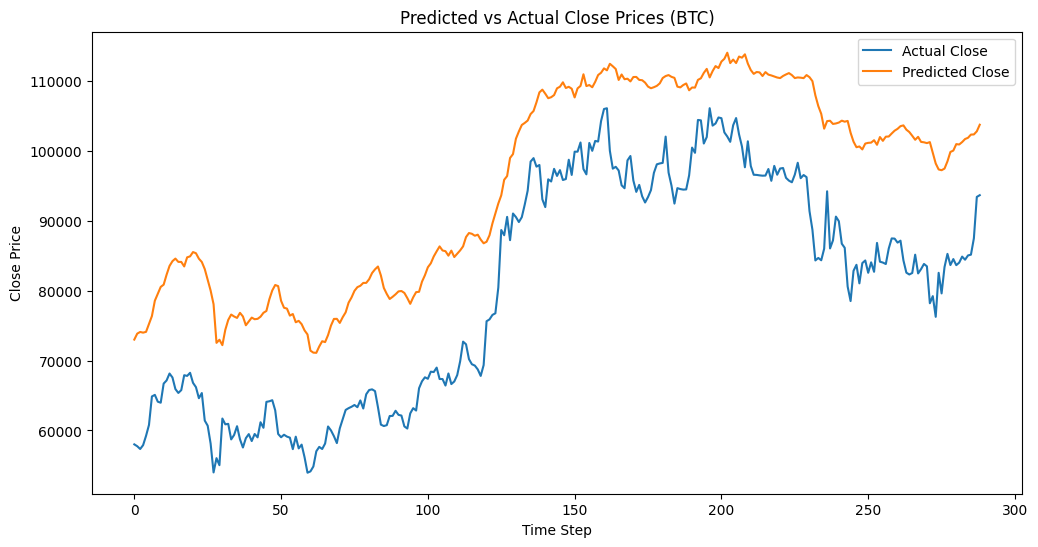

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
(289, 5)
LTC Evaluation
MSE : 98216.03177221837
RMSE: 313.3943709963827
MAE : 238.44523752601913
R²  : 0.7324989552642607


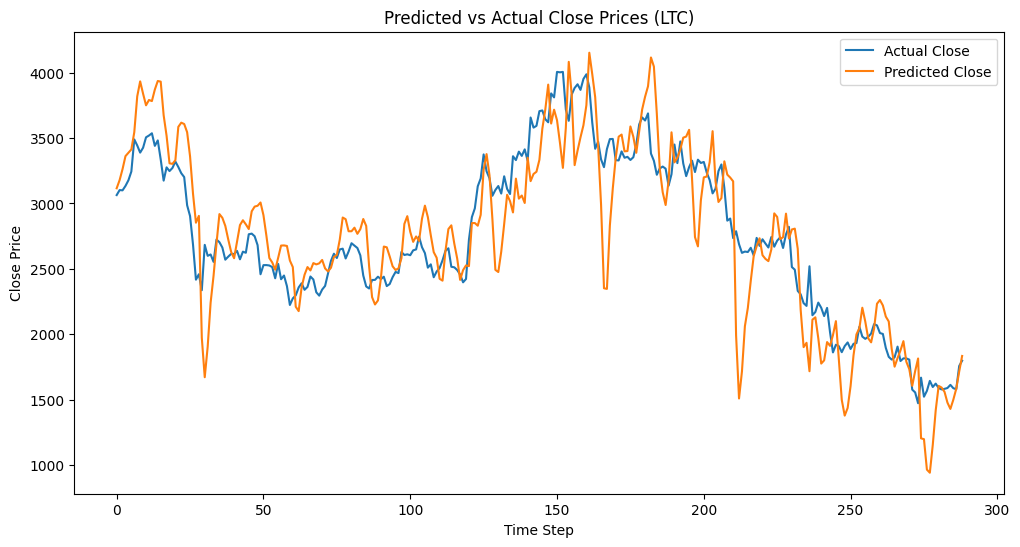

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
(289, 5)
ETH Evaluation
MSE : 176.32999423827826
RMSE: 13.278930462890385
MAE : 11.682939113630143
R²  : 0.6553416861964381


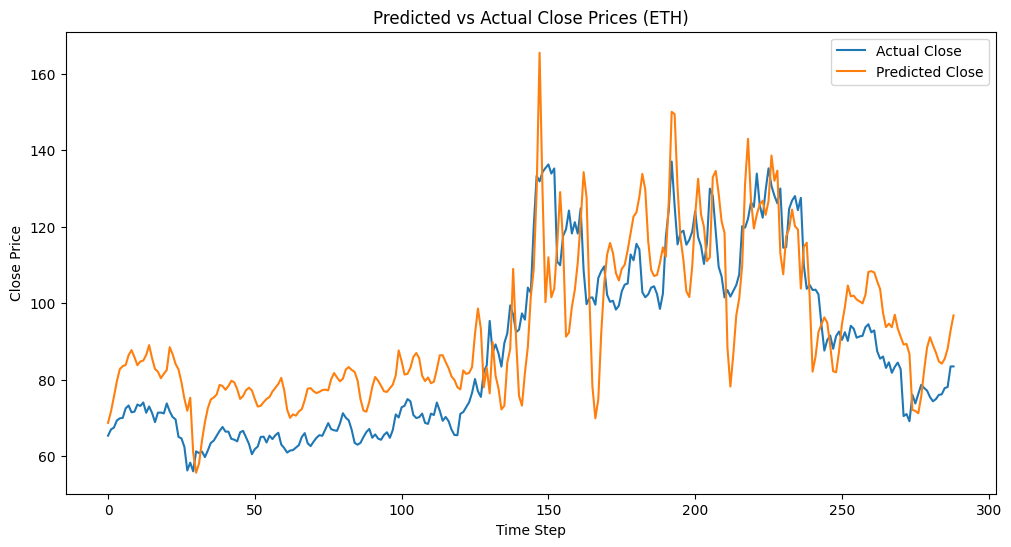

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
(867, 5)
Equal Evaluation
MSE : 80746011.63384137
RMSE: 8985.878456436041
MAE : 5117.344118916864
R²  : 0.9448503971038071


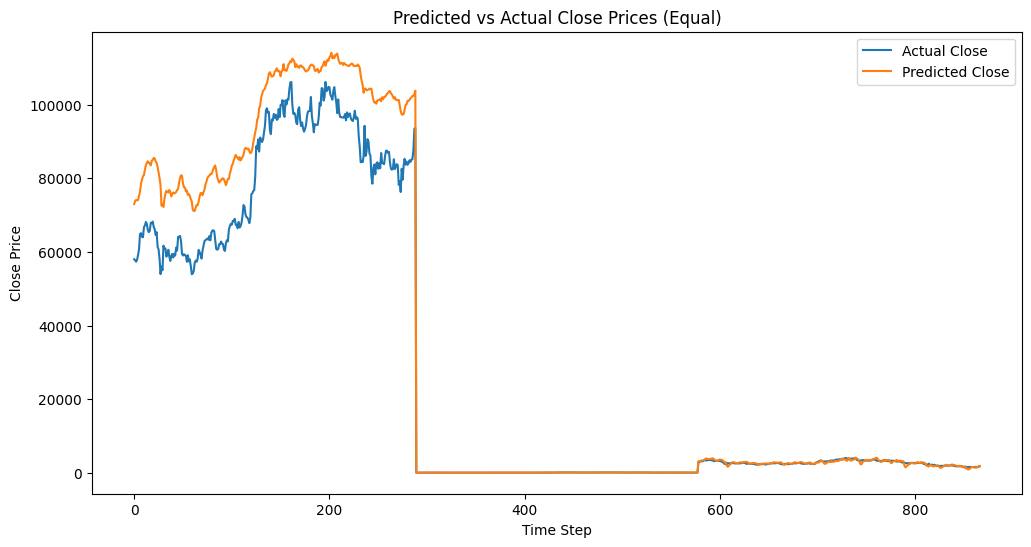

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
(250, 5)
Random Evaluation
MSE : 72849814.30605583
RMSE: 8535.210267243323
MAE : 4630.5251324920655
R²  : 0.944662283539955


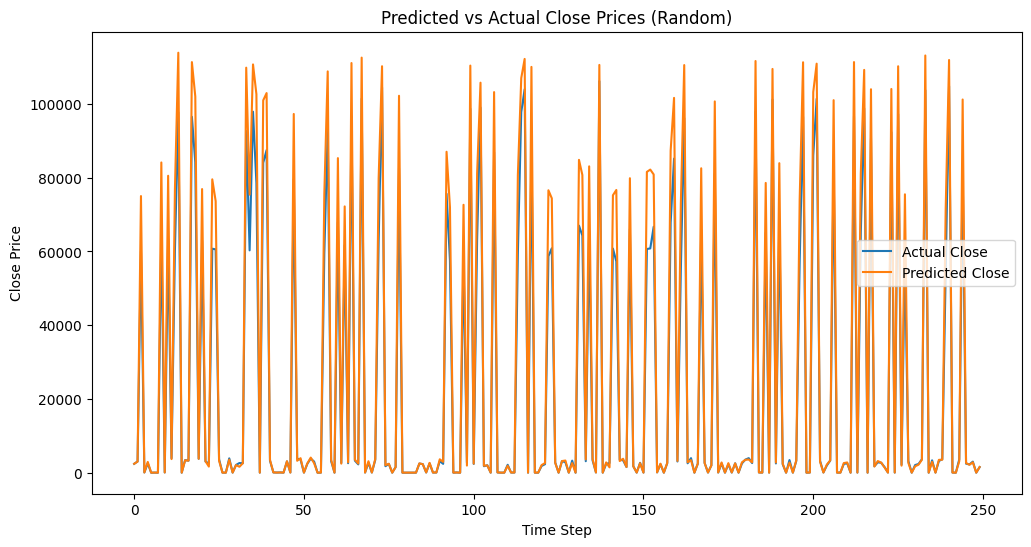

In [43]:
x_test_sets = [X_test_btc, X_test_ltc, X_test_eth, X_test_equal, X_test_random]
y_test_sets = [y_test_btc, y_test_ltc, y_test_eth, y_test_equal, y_test_random]
x_test_names = ['BTC', 'LTC', 'ETH', 'Equal', 'Random']

for i in range(len(x_test_sets)):
    x_test = x_test_sets[i]
    y_test = y_test_sets[i]
    
    predicted_close, real_close = prediction(model_reload, x_test, y_test)
    evaluate_model(real_close, predicted_close, model_name=x_test_names[i])
    
    plt.figure(figsize=(12,6))
    plt.plot(real_close, label="Actual Close")
    plt.plot(predicted_close, label="Predicted Close")
    plt.title(f"Predicted vs Actual Close Prices ({x_test_names[i]})")
    plt.xlabel("Time Step")
    plt.ylabel("Close Price")
    plt.legend()
    plt.show()